**Aim: What are the different sentiments of the customers towards the product in the given reviews?**

This notebook is prepared to answer the first question of the research (
“Sentiment Analysis to Analyse Customer Reviews and Identify Areas for Improvement in The Product”
).

For this the dataset used is the dataset(b) (Yu 2022) available on the online platform “Kaggle”  which is in CSV (Comma Separated Values) format and consists of 52,942 data points and 12 features.

Name of the file is: **Amazon Echo Dot 2 Reviews.csv**

This dataset can be downloaded from the given link:
https://www.kaggle.com/datasets/linzey/amazon-echo-dot-2-reviews

**To answer the proposed question of the research, following steps are followed:**



1.   Importing the required libraries.
2.   Loading the dataset.
3.   Data Analysis
4.   Preprocessing of Textual data
5.   Polarity Distribution
6.   Analysis of different sentiments of reviews
7.   Splitting the Dataset and applying Random Over Sampling
8.   Counterize the data using countervectorizer
9.   Apply StratifiedKfold cross-validation
10.   Implementation of following algorithms followed by validation on test data and hyperparameter tuning:

*   Support Vector Machine
*   Logistic Regression
*   Naive Bayes Classifier
*   Decision tree Classifier

**Importing the required Libraries**

All the required libraries that will support efficient execution of the code are imported in the following code cell.

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Loading the Dataset**

In this notebook the above discussed data is downloaded from the website which is in CSV format and uploaded here using the upload feature of the Google Colab.

In [ ]:
# To read the dataset
ds = pd.read_csv('/content/Amazon Echo Dot 2 Reviews.csv')                       # Here "ds" is defined as the dataset provided

**Dataset Analysis**

After looking at the data it is found that it consist of several columns in which different information is stored.
The column are: 'Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title', 'Review Text',
       'Review Color', 'User Verified', 'Review Date', 'Review Useful Count',
       'Configuration Text', 'Ratting', 'Declaration Text'.
Out of the given columns the most valuable and required information is stored in 'Review Text' thus except that all other columns are dropped. After further analysis the found missing values from the 'Review Text' are dropped.

In [ ]:
# To display the first few rows of the dataset
ds.head()

,Uniq Id,Crawl Timestamp,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Ratting,Declaration Text
0,d63583450415a20094950528ffb4d955,2017-10-26T15:57:14Z,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love the Echo Dot.,Black,Verified Purchase,2017-07-03,NaN,Echo Dot,5.0 out of 5 stars,NaN
1,dc8e5ca6b44bea1006c8bb85cdca3816,2017-10-26T15:57:14Z,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Working just fine.,Black,Verified Purchase,2017-07-12,NaN,Echo Dot,5.0 out of 5 stars,NaN
2,f3f823996e2317dd65a6235011492b42,2017-10-26T15:57:14Z,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I love my Echo Dot,Black,Verified Purchase,2017-08-01,NaN,Echo Dot,5.0 out of 5 stars,NaN
3,3b6c928e62707a1530c591b897b864d6,2017-10-26T15:57:14Z,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,2017-10-03,NaN,Echo Dot,3.0 out of 5 stars,NaN
4,275af85c81c1be55efd706f51a6c7cbe,2017-10-26T15:57:14Z,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great assistant !!,Black,Verified Purchase,2017-07-22,NaN,Echo Dot,5.0 out of 5 stars,NaN


In [ ]:
# To get column names
ds.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title', 'Review Text',
       'Review Color', 'User Verified', 'Review Date', 'Review Useful Count',
       'Configuration Text', 'Ratting', 'Declaration Text'],
      dtype='object')

In [ ]:
# To drop all the cloumns other than customer's feedback(Review Text) as we are going to use text dataset only to perform sentiment analysis
fb_ds = ds.drop(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title',
       'Review Color', 'User Verified', 'Review Date', 'Review Useful Count',
       'Configuration Text', 'Ratting', 'Declaration Text'], axis=1)              # Here 'axis=1' is to specify to drop columns(as opposed to rows)

# To display the first 10 rows of the resulting dataset
fb_ds.head(10)

,Review Text
0,Love the Echo Dot.
1,Working just fine.
2,I love my Echo Dot
3,Not great speakers
4,Great assistant !!
5,Works like a charm
6,Great little gagit
7,It needs some work
8,Neat little helper
9,Just what I needed


In [ ]:
# To analyse the data in the text dataframe(fb_ds)
print(fb_ds['Review Text'].iloc[10],"\n")                                       # Used "\n" for new line
print(fb_ds['Review Text'].iloc[100],"\n")
print(fb_ds['Review Text'].iloc[200],"\n")
print(fb_ds['Review Text'].iloc[300],"\n")
print(fb_ds['Review Text'].iloc[400],"\n")

Still learning. This is amazing. 

The best toy I bought myself in a long time. 

Awesome 

Echo Dot andAmazon Echo are great!! 

For the price and what it can do, I'm impressed.  I now have three of them set up throughout the house.  They sometimes have trouble hearing my children, but they seem to hear me fine.  I will probably pick up a few more in the future for a few other rooms in the house.The kids like to listen to music with them, but the built in speaker really isn't up to the task and the sound gets distorted with the volume over half.My wife and I use it for information and the occasional trivia game. 



In [ ]:
# Code to check missing values in the "Review Text" column of the dataframe
print(fb_ds['Review Text'].isna().sum())

13


In [ ]:
# Code to drop the missing values from the column
fb_ds = fb_ds.dropna(subset=['Review Text'])

In [ ]:
# To check the information of the data
fb_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53035 entries, 0 to 53047
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  53035 non-null  object
dtypes: object(1)
memory usage: 828.7+ KB


 **Preprocessing for Textual data**

 Under this section the data cleaning is performed to assure the better computation by removing the invaluable information from the dataset by following different process for example, removing urls, hashtags, duplicate text, performing tokenization using NLTK library.

In [ ]:
# Create a function to do preprocessing for textual data
def pre_processing(text):
  text = text.lower()                                                           # To convert text into lower case
  text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)       # To remove url from the reviews using regex
  text = re.sub(r'\@w+|\#','',text)                                             # To remove hastags and punctuations using regex
  text = re.sub(r'[^\w\s]', '', text)                                           # To remove all other non-word and non-space characters using regex
  text_tokens = word_tokenize(text)                                             # Tokenization to split the words into individual words using nltk library
  new_text = [w for w in text_tokens if not w in stop_words]                    # To remove stopwords from the text as the have no use in sentiment analysis
  return " ".join(new_text)                                                     # To return the words joined into single string by 'join()'.

In [ ]:
# To apply the preprocessing function on the dataset.
nltk.download('punkt')                                                          # To download punkt module from nltk
fb_ds['Review Text'] = fb_ds['Review Text'].fillna('')                          # To fill missing values in the column with the empty string
fb_ds['Review Text'] = fb_ds['Review Text'].apply(pre_processing)               # To apply the preprocessing on the 'Review Text' column and store the updated text in the 'Review Text'.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# To check and drop duplicate data by using duplicate method
print("Number of duplicates available, before removal:", fb_ds.duplicated().sum())  # Print total sum of duplicates available
fb_ds = fb_ds.drop_duplicates('Review Text')                                        # To drop the duplicates from the dataset
print("Number of duplicates available, after removal:", fb_ds.duplicated().sum())   # Print total sum of duplicates available

Number of duplicates available, before removal: 11798
Number of duplicates available, after removal: 0


In [ ]:
# To perform stemming using PorterStemmer on the data so we can bring the data to its base form
stemmer = PorterStemmer()
fb_ds['Review Text'] = fb_ds['Review Text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [ ]:
# To display data in the head function
fb_ds.head()

,Review Text
0,love echo dot
1,work fine
3,great speaker
4,great assist
5,work like charm


In [ ]:
# To check the implimentation of preprocessing on the data in the dataframe(fb_ds)
print(fb_ds['Review Text'].iloc[0],"\n")                                       # Used "\n" for new line
print(fb_ds['Review Text'].iloc[1],"\n")
print(fb_ds['Review Text'].iloc[2],"\n")
print(fb_ds['Review Text'].iloc[3],"\n")
print(fb_ds['Review Text'].iloc[4],"\n")

love echo dot 

work fine 

great speaker 

great assist 

work like charm 



In [ ]:
# To check updated information of the column
fb_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 53047
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  41237 non-null  object
dtypes: object(1)
memory usage: 644.3+ KB



**Polarity Of Data**

For sentiment analysis it is important to understand the emotions of the text and to make machine understand that NLP libraries are available which helps in assigning the polarity to the text. Thus, using TextBlob library polarities are assigned to the text and on basis of that text is distributed into different sentiments.

In [ ]:
# Define a function to calculate the polarity of the data using text blob
def ds_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# To apply the polarity function on the dataframe
fb_ds['polarity'] = fb_ds['Review Text'].apply(ds_polarity)
fb_ds.head(10)                                                                  # To display the data using head function

,Review Text,polarity
0,love echo dot,0.500000
1,work fine,0.416667
3,great speaker,0.800000
4,great assist,0.800000
5,work like charm,0.000000
6,great littl gagit,0.800000
7,need work,0.000000
8,neat littl helper,0.000000
9,need,0.000000
10,still learn amaz,0.000000


In [ ]:
# To add sentiment column to the dataframe

# Define a function to calculate the sentiment
def ds_sentiment(label):
  if label <0:
    return "Negative"
  elif label ==0:
      return "Neutral"
  elif label >0:
      return "Positive"

In [ ]:
# To apply the sentiment function to the dataframe
fb_ds['sentiment'] = fb_ds['polarity'].apply(ds_sentiment)
fb_ds.head(10)                                                                    # Display to check the implementation of the sentiment function

,Review Text,polarity,sentiment
0,love echo dot,0.500000,Positive
1,work fine,0.416667,Positive
3,great speaker,0.800000,Positive
4,great assist,0.800000,Positive
5,work like charm,0.000000,Neutral
6,great littl gagit,0.800000,Positive
7,need work,0.000000,Neutral
8,neat littl helper,0.000000,Neutral
9,need,0.000000,Neutral
10,still learn amaz,0.000000,Neutral


In [ ]:
# Code to check missing values in the "Review Text" column of the dataframe
print(fb_ds['Review Text'].isna().sum())
print(fb_ds['sentiment'].isna().sum())

0
0


In [ ]:
# Code to drop the missing values from the column
fb_ds = fb_ds.dropna(subset=['Review Text'])
fb_ds = fb_ds.dropna(subset=['sentiment'])

**Visualization**

Under this section the data is visualized by using bar-plot and pie-chart to understand the available dataset. The visualization has depicted the dataset is imbalanced as large proportion belongs to positive analysis.

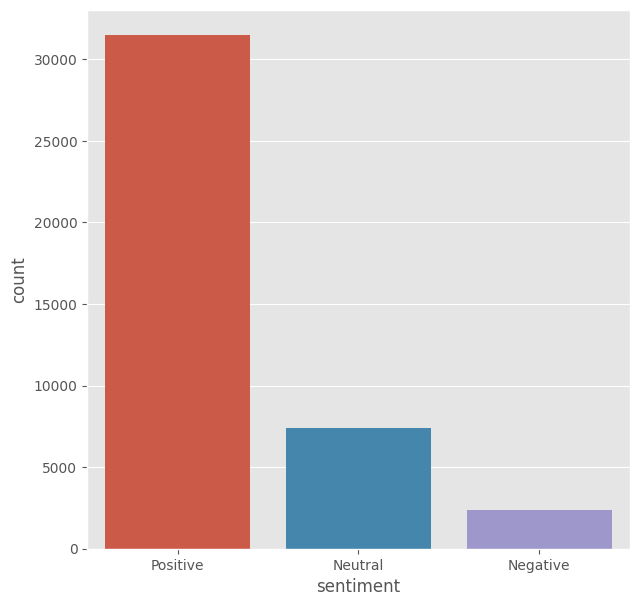

In [ ]:
# To visualize the data in the countplot
ds_fig = plt.figure(figsize=(7,7))                                              # To create a figure with a specified size
sns.countplot(x='sentiment', data = fb_ds)                                      # To create a countplot of the 'sentiment' column in the dataframe
plt.show()                                                                      # To display the plot

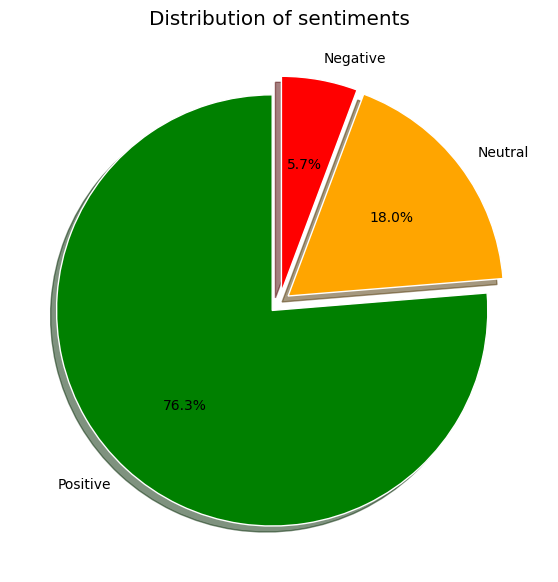

In [ ]:
from matplotlib.patches import Wedge                                            # import wedge to provide specification to the edges

# To represent the data in a pie chart
ds_fig = plt.figure(figsize=(7,7))                                              # To create a figure of specific size
ds_colors = ("green", "orange", "red")                                          # To set different colors for the sentiments
ds_wp = {'linewidth':1, 'edgecolor': "white"}                                   # To define line width and edge color
tags = fb_ds['sentiment'].value_counts()                                        # To specify value of different sentiments in the chart
explode = (0.05,0.05,0.05)                                                      # To provide seperation between different divisons for better visuality
tags.plot(kind='pie', autopct='%1.1f%%', shadow= True, colors= ds_colors,
          startangle=90, wedgeprops = ds_wp, explode = explode, label='')       # For implementation of the defined input on the chart
plt.title('Distribution of sentiments')                                         # To provide heading to the chart
plt.show()                                                                      # To display the plot

**Analysis of reviews from different sentiment section**
In this section it is tried to expressed the different kind of words that are there in different sentiments and those are expressed using word-cloud so that we can identify difference in different sentiments.


In [ ]:
# For Positive Reviews
pos_review = fb_ds[fb_ds.sentiment == 'Positive']                               # To select the rows where sentiment column is equal to positive
pos_review = pos_review.sort_values(['polarity'], ascending= False)             # To sort the positive reviews in descending order of polarity scores
pos_review.head()                                                               # To display the value using head function

,Review Text,polarity,sentiment
18773,fantast item easi setup start use best christm...,1.0,Positive
1246,perfect apart easi instal use,1.0,Positive
34856,work perfect,1.0,Positive
34876,one best invent decad,1.0,Positive
1195,selectivelimit app compat learn talk best feat...,1.0,Positive


Text(0.5, 1.0, 'Most frequent words in Positive Reviews')

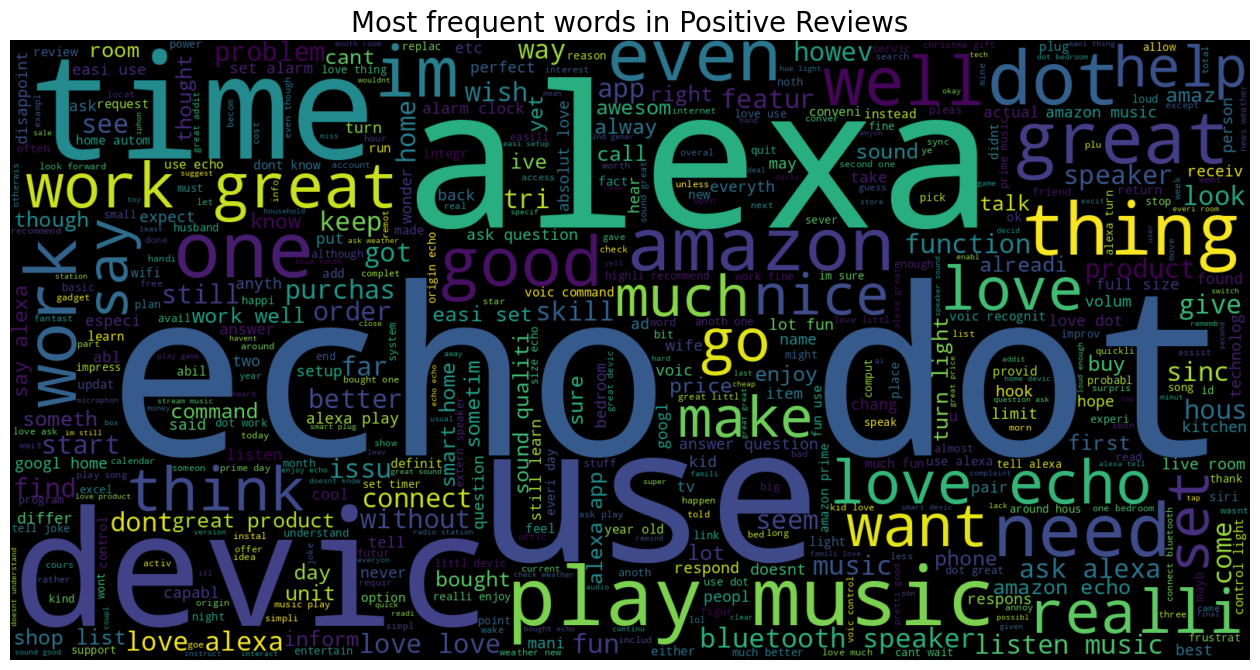

In [ ]:
import wordcloud                                                                # Import wordcloud to visualize the word cloud of different words of different sentiments
# Visualize words in all the positive reviews
text = ' '.join([word for word in pos_review['Review Text']])                   # The words from positive reviews will be extracted and joined in a single string
plt.figure(figsize = (16,16), facecolor='None')                                 # To specify the size of figure
wordcloud = WordCloud(max_words=500, width=1600, height=800). generate(text)    # Height, width and limit of words for word cloud is specified here.
                                                                                # Generate is called to generate the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')                                 # "imshow" to display the image
plt.axis('off')                                                                 # To specify axis
plt.title('Most frequent words in Positive Reviews', fontsize=20)               # To specify title and font size of the title

In [ ]:
# For Negative Reviews
neg_review = fb_ds[fb_ds.sentiment == 'Negative']                               # To select the rows where sentiment column is equal to negative
neg_review = neg_review.sort_values(['polarity'], ascending= False)             # To sort the negative reviews in descending order of polarity scores
neg_review.head()                                                               # To display the value using head function

,Review Text,polarity,sentiment
554,get close sometim doesnt ask pandora mess ever...,-1.387779e-17,Negative
53045,get one youll almost certainli want troubl jus...,-3.700743e-17,Negative
45590,like pardon languag smaller idiot nephew echo ...,-1.851852e-03,Negative
31251,bought high hope ultim disappoint app tell hea...,-2.222222e-03,Negative
30611,ive receiv devic corpor gift glad didnt pay mo...,-2.551020e-03,Negative


Text(0.5, 1.0, 'Most frequent words in Negative Reviews')

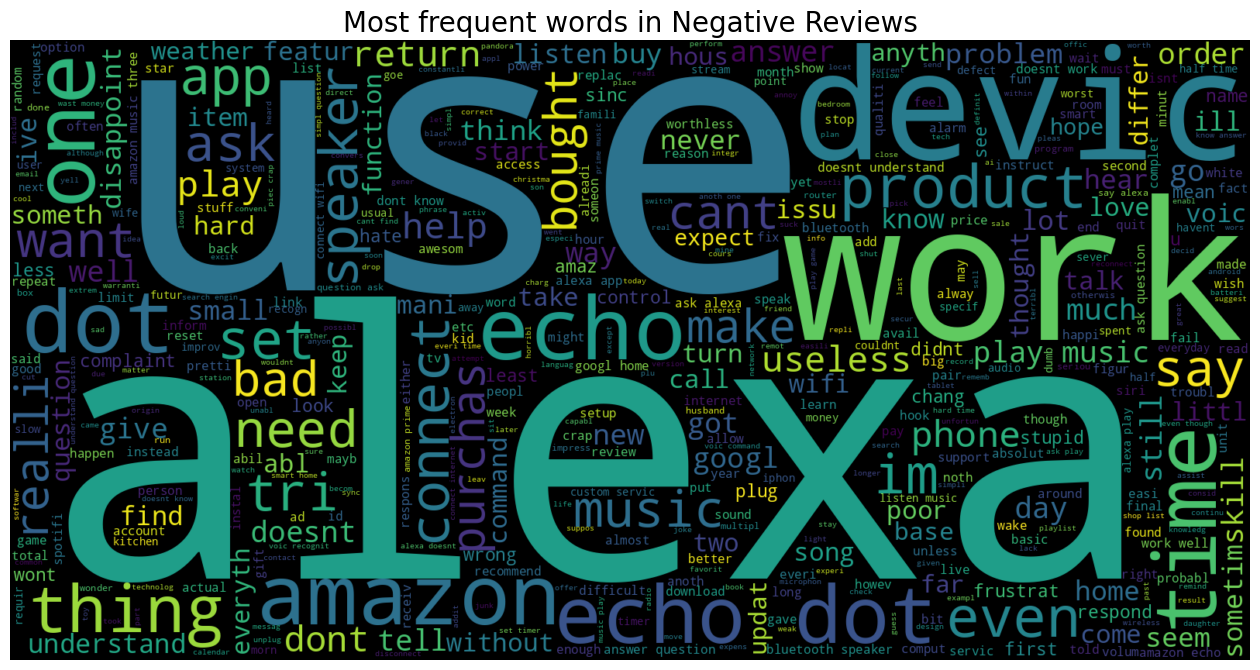

In [ ]:
# Visualize words in all the negative reviews
text = ' '.join([word for word in neg_review['Review Text']])                   # The words from negative reviews will be extracted and joined in a single string
plt.figure(figsize = (16,16), facecolor='None')                                 # To specify the size of figure
wordcloud = WordCloud(max_words=500, width=1600, height=800). generate(text)    # Height, width and limit of words for word cloud is specified here.
                                                                                # Generate is called to generate the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')                                 # "imshow" to display the image
plt.axis('off')                                                                 # To specify axis
plt.title('Most frequent words in Negative Reviews', fontsize=20)               # To specify title and font size of the title

In [ ]:
# For Neutral Reviews
neu_review = fb_ds[fb_ds.sentiment == 'Neutral']                                # To select the rows where sentiment column is equal to neutral
neu_review = neu_review.sort_values(['polarity'], ascending= False)             # To sort the neutral reviews in descending order of polarity scores
neu_review.head()                                                               # To display the value using head function

,Review Text,polarity,sentiment
5,work like charm,0.0,Neutral
33451,realli awesom use,0.0,Neutral
33525,bought grandson room realli like,0.0,Neutral
33524,doesnt like whisper bit control sing time know...,0.0,Neutral
33512,echo dot receiv consist stay connect bluetooth...,0.0,Neutral


Text(0.5, 1.0, 'Most frequent words in Neutral Reviews')

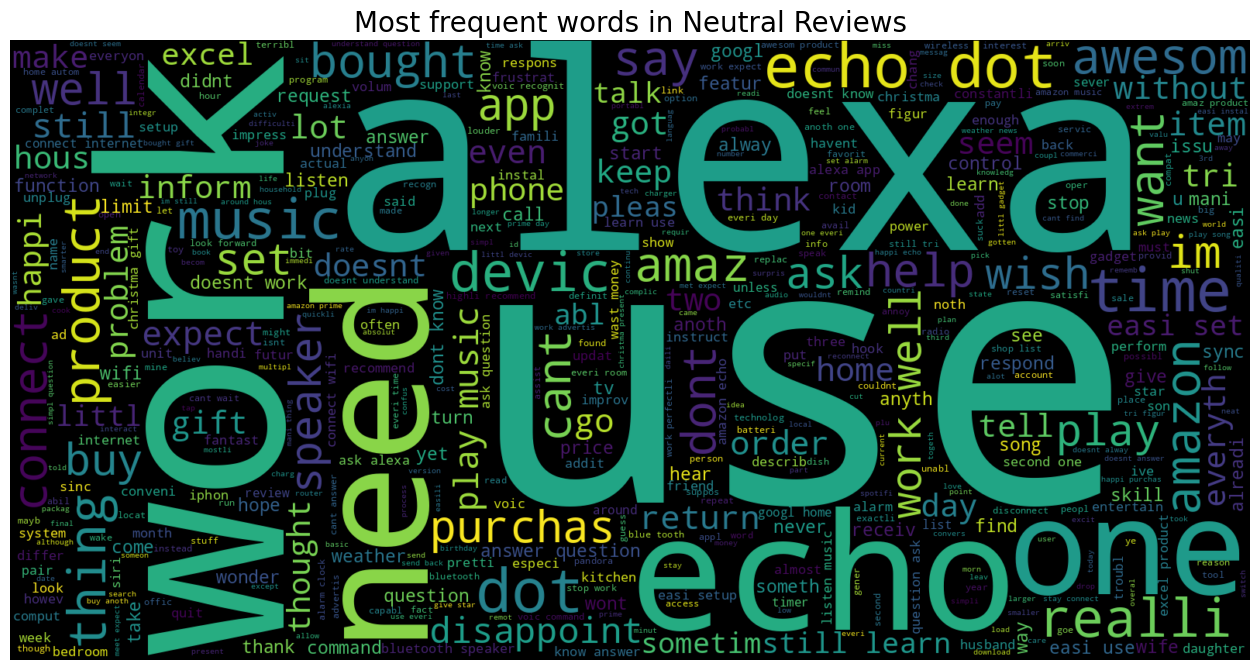

In [ ]:
# Visualize words in all the negative reviews
text = ' '.join([word for word in neu_review['Review Text']])                   # The words from neutarl reviews will be extracted and joined in a single string
plt.figure(figsize = (16,16), facecolor='None')                                 # To specify the size of figure
wordcloud = WordCloud(max_words=500, width=1600, height=800). generate(text)    # Height, width and limit of words for word cloud is specified here.
                                                                                # Generate is called to generate the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')                                 # "imshow" to display the image
plt.axis('off')                                                                 # To specify axis
plt.title('Most frequent words in Neutral Reviews', fontsize=20)                # To specify title and font size of the title

In [ ]:
# To remove unwanted warnings error used filter warning
import warnings
warnings.filterwarnings('ignore')

**Splitting the Dataset and applying Random Over Sampling**

The analysis of the dataset shows that dataset is imbalance that may leads to false predictions thus to avoid that RandomOver Sampling is performed which will introduce random minority samples to increase the size of minority classes.

For that the dataset is  split into training and testing data in the ratio of 80 and 20 respectively. Then, Random Over Sampling is done on trainng data and testing data is kept untouched so we can validate the performance on testing data.

Also, after splitting some empty data was observed in testing dataset and that is removed to avoid any noise.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assign X and y to the Review Text and sentiment coumn respectively.
X = fb_ds['Review Text']
y = fb_ds['sentiment']
# Here the dataset is Split into two parts for example, train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Resampling the training data with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.to_frame(), y_train)
# After resampling, data is converted back to pandas DataFrame
train_ds = pd.concat([X_train_resampled.reset_index(drop=True), y_train_resampled], axis=1)
test_ds = pd.concat([X_test.reset_index(drop=True), y_test], axis=1)
train_ds.head(10)

,Review Text,sentiment
0,thoroughli enjoy echo dot find use except wish...,Positive
1,alexa limit respond sorri dont know frequent,Positive
2,technic nice power devic speech recognit part ...,Positive
3,use nice around wish could somehow connect son...,Positive
4,purchas use logitech harmoni hub enabl voic co...,Negative
5,love thing wont play certain song artist custo...,Positive
6,prossmal fit everywher price tag spotifyconssp...,Neutral
7,far electron compat alexa,Positive
8,receiv daughter father day gift think awesom a...,Neutral
9,great idea like descend siri good number reque...,Positive


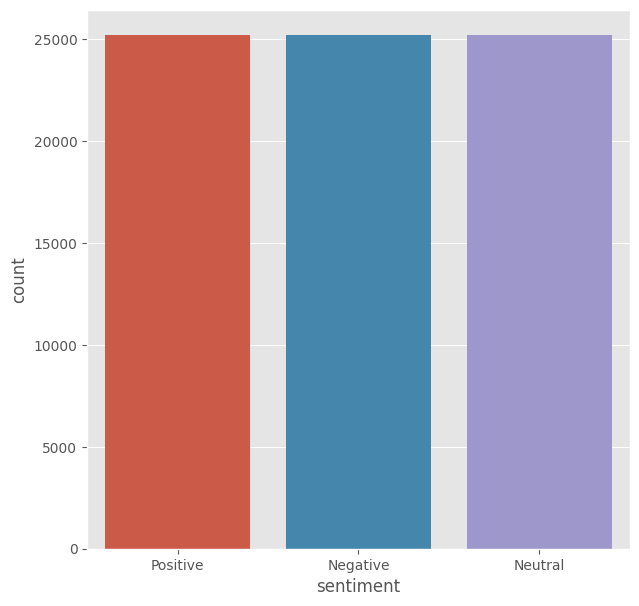

In [ ]:
# To visualize the data in the countplot
ds_fig = plt.figure(figsize=(7,7))                                              # To create a figure with a specified size
sns.countplot(x='sentiment', data = train_ds)                                   # To create a countplot of the 'sentiment' column in the dataframe
plt.show()

In [ ]:
test_ds                                                                         #test dataset

,Review Text,sentiment
0,absolut love echo dot bought read posit review...,NaN
1,50 buck great bargain use gagset alexa sure ma...,Positive
2,alexa respons entertain,NaN
3,handi time time ask alexa play system pandora ...,NaN
4,okay could live without,NaN
...,...,...
52810,NaN,Positive
9489,NaN,Positive
11485,NaN,Positive
29316,NaN,Neutral


In [ ]:
# To show null value and drop them
from nltk.sem.drt import test_draw
print(test_ds.isna().sum())
test_ds = test_ds.dropna(subset=['Review Text'])
test_ds = test_ds.dropna(subset=['sentiment'])

Review Text    6780
sentiment      6780
dtype: int64


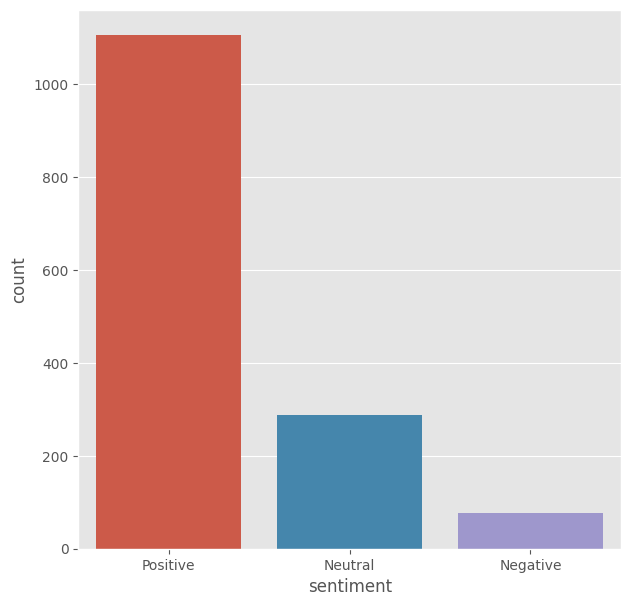

In [ ]:
# To visualize the data in the countplot
ds_fig = plt.figure(figsize=(7,7))                                              # To create a figure with a specified size
sns.countplot(x='sentiment', data = test_ds)                                    # To create a countplot of the 'sentiment' column in the dataframe
plt.show()

**Counterize the data using countVectorizer**

For implementation of differnt supervised-algorithms on text data, it is required to vectorize the text data which is done here with the help of countvectorizer.

In [ ]:
# Perform vectorization and create a BOW using uni-gram and bi-gram language model
# Will be used to transform text data into numerical feature
vec = CountVectorizer(ngram_range=(1, 2))

**Apply StratifiedKfold Cross Validation**

StratifiedK-fold cross validation is used validate the performance of the model, it is similar to Kfold but the difference is that here in each fold equal samples from different classes are preserved.After training the model it can be expected that it will perform good on unseen data.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define number of folds for cross validation
n_folds = 5
# Represent the stratified k-fold splitter
skfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
# Get the features and target variable
X = train_ds['Review Text']
y = train_ds['sentiment']
# Transform and fit countvectorizer to training data to get matrix for training of ML model
X = vec.fit_transform(X)
# Transform and vectorize test data to get matrix for testing of ML model
Xtest = vec.transform(X_test)

**Implementation of different algorithms**
Now the dataset is ready to be implemnted on algorithm. Thus to compare different algorithms and find a best model 4 models are opted which are based on supervised learnings.

To compare the efficiency of each model each step is performed on every model, for example;
Every model is trained on training model and the performance is validated on test data. Post that hypermarameter-tuning is performed for every model for comparison purpose.

The observations from the output of different algorithms, it can be stated that;

For training dataset each model performed nearly same except Naive Bayes Model which performed less. But on Validation-dataset the performance got reduced and SVM model acheved highest accuracy that is 97.31%, which is further increased to 97.37%.

 **For Model 1: Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC
svcmodel = LinearSVC()
# accuracy for each fold
m_acc = cross_val_score(svcmodel, X, y, cv=skfold, scoring='accuracy')
# mean accuracy of all folds
mean_accuracy = np.mean(m_acc)
print("Mean Accuracy:{:.2f}%".format(mean_accuracy*100))

Mean Accuracy:99.52%


**Evaluation of Support Vector Machine Model using test data**

In [ ]:
# Predict the values for given test data and print the accuracy
svcmodel.fit(X, y)
svc_pred = svcmodel.predict(Xtest)
# Evaluate Prediction
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))
# Print the confusion matrix in the classification report
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

test accuracy: 97.31%
[[ 340   44   75]
 [  10 1476   16]
 [  34   43 6210]]


              precision    recall  f1-score   support

    Negative       0.89      0.74      0.81       459
     Neutral       0.94      0.98      0.96      1502
    Positive       0.99      0.99      0.99      6287

    accuracy                           0.97      8248
   macro avg       0.94      0.90      0.92      8248
weighted avg       0.97      0.97      0.97      8248



**Hyper-Parameter Tuning of Support Vector Machine Model:**

Hyper-Parameters control the learning rate of the model which may leads to change in the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameters for the SVM model
p_grid = {'C':[0.01, 0.1, 1, 10]}
# Define the grid search for SVM model
grid = GridSearchCV(svcmodel, p_grid)
grid.fit(X, y)                              # fit the data
grid_pred = grid.predict(Xtest)
# Print the best parameter
print("Best parameters:", grid.best_params_)
# Calculate the model accuracy to see the change
svc_acc = accuracy_score(grid_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
print("\n")
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

Best parameters: {'C': 10}
Test accuracy: 97.37%


[[ 338   43   78]
 [  11 1476   15]
 [  33   37 6217]]


              precision    recall  f1-score   support

    Negative       0.88      0.74      0.80       459
     Neutral       0.95      0.98      0.97      1502
    Positive       0.99      0.99      0.99      6287

    accuracy                           0.97      8248
   macro avg       0.94      0.90      0.92      8248
weighted avg       0.97      0.97      0.97      8248



**For Model 2: Logistic Regression Model**

In [ ]:
logreg = LogisticRegression()
# Accuracy for each fold
m_acc = cross_val_score(logreg, X, y, cv=skfold, scoring='accuracy')
# Mean accuracy of all folds
mean_accuracy = np.mean(m_acc)
print("Mean Accuracy:{:.2f}%".format(mean_accuracy*100))

Mean Accuracy:99.07%


In [ ]:
# Evaluation using test data
# Predict the values for given test data and print the accuracy
logreg.fit(X, y)
logreg_pred = logreg.predict(Xtest)
# Evaluate Prediction
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy: {:.2f}%".format(logreg_acc*100))
# Print the confusion matrix in the classification report
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

test accuracy: 96.62%
[[ 366   45   48]
 [  16 1471   15]
 [  62   93 6132]]


              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81       459
     Neutral       0.91      0.98      0.95      1502
    Positive       0.99      0.98      0.98      6287

    accuracy                           0.97      8248
   macro avg       0.91      0.92      0.91      8248
weighted avg       0.97      0.97      0.97      8248



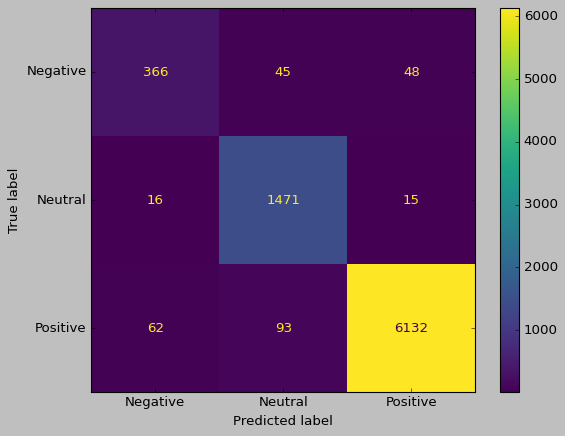

In [ ]:
# Another way to visualize the confusion matrix using confusion matrix display.

# Set style for confusion matrix display
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

**Hyper-Parameter Tuning of Logistic regression Model:**

In [ ]:
# Import grid search cv for hyper-parameter
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning on c parameter as we are using logistic regression model
# Define the c along the classifier
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X, y) # fit the data
grid_pred = grid.predict(Xtest)
# Print the best parameter
print("Best parameters:", grid.best_params_)
# Calculate the model accuracy to see the change
logreg_acc = accuracy_score(grid_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print("\n")
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

Best parameters: {'C': 10}
Test accuracy: 97.01%


[[ 365   41   53]
 [  17 1470   15]
 [  51   70 6166]]


              precision    recall  f1-score   support

    Negative       0.84      0.80      0.82       459
     Neutral       0.93      0.98      0.95      1502
    Positive       0.99      0.98      0.98      6287

    accuracy                           0.97      8248
   macro avg       0.92      0.92      0.92      8248
weighted avg       0.97      0.97      0.97      8248



**For Model 3: Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
# Accuracy for each fold
m_acc = cross_val_score(NB_classifier, X, y, cv=skfold, scoring='accuracy')
# Mean accuracy of all folds
mean_accuracy = np.mean(m_acc)
print("Mean Accuracy:{:.2f}%".format(mean_accuracy*100))

Mean Accuracy:94.09%


**Evaluation of Naive Bayes Model using test data**

In [ ]:
# Predict the values for given test data and print the accuracy
NB_classifier.fit(X, y)
NB_classifier_pred = NB_classifier.predict(Xtest)
# Evaluate Prediction
NB_classifier_acc = accuracy_score(NB_classifier_pred, y_test)
print("test accuracy: {:.2f}%".format(NB_classifier_acc*100))
# Print the confusion matrix in the classification report
print(confusion_matrix(y_test, NB_classifier_pred))
print("\n")
print(classification_report(y_test, NB_classifier_pred))

test accuracy: 84.31%
[[ 215   10  234]
 [ 295  646  561]
 [ 180   14 6093]]


              precision    recall  f1-score   support

    Negative       0.31      0.47      0.37       459
     Neutral       0.96      0.43      0.59      1502
    Positive       0.88      0.97      0.92      6287

    accuracy                           0.84      8248
   macro avg       0.72      0.62      0.63      8248
weighted avg       0.87      0.84      0.83      8248



**Hyper-Parameter Tuning of Naive Bayes Model:**


In [ ]:
# Defining parameters for Multinomial Naive Bayes
param_grid={'alpha':[0.1, 1.0, 10.0]}
grid = GridSearchCV(NB_classifier, param_grid)
grid.fit(X, y) # fit the data
grid_pred = grid.predict(Xtest)
# Print the best parameter
print("Best parameters:", grid.best_params_)
# Calculate the model accuracy to see the change
NB_classifier_acc = accuracy_score(grid_pred, y_test)
print("Test accuracy: {:.2f}%".format(NB_classifier_acc*100))
print("\n")
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

Best parameters: {'alpha': 0.1}
Test accuracy: 85.79%


[[ 110   20  329]
 [ 134  777  591]
 [  52   46 6189]]


              precision    recall  f1-score   support

    Negative       0.37      0.24      0.29       459
     Neutral       0.92      0.52      0.66      1502
    Positive       0.87      0.98      0.92      6287

    accuracy                           0.86      8248
   macro avg       0.72      0.58      0.63      8248
weighted avg       0.85      0.86      0.84      8248



**For Model 4: Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# Accuracy for each fold
m_acc = cross_val_score(svcmodel, X, y, cv=skfold, scoring='accuracy')
# Mean accuracy of all folds
mean_accuracy = np.mean(m_acc)
print("Mean Accuracy:{:.2f}%".format(mean_accuracy*100))

Mean Accuracy:99.52%


**Evaluation of Decision tree classifier Model using test data**

In [ ]:
# Predict the values for given test data and print the accuracy
dtc.fit(X, y)
dtc_pred = dtc.predict(Xtest)
# Evaluate Prediction
dtc_acc = accuracy_score(dtc_pred, y_test)
print("test accuracy: {:.2f}%".format(dtc_acc*100))
# Print the confusion matrix and the classification report
print(confusion_matrix(y_test, dtc_pred))
print("\n")
print(classification_report(y_test, dtc_pred))

test accuracy: 95.02%
[[ 336   16  107]
 [  25 1450   27]
 [ 213   23 6051]]


              precision    recall  f1-score   support

    Negative       0.59      0.73      0.65       459
     Neutral       0.97      0.97      0.97      1502
    Positive       0.98      0.96      0.97      6287

    accuracy                           0.95      8248
   macro avg       0.85      0.89      0.86      8248
weighted avg       0.96      0.95      0.95      8248



**Hyper-Parameter Tuning of Decision Tree Classifier Model:**


In [ ]:
# Define the c along the classifier
param_grid={'max_depth':[5, 10, 20, 30], 'min_samples_split': [2,5,10,20]}
grid = GridSearchCV(dtc, param_grid)
grid.fit(X, y) # fit the data
grid_pred = grid.predict(Xtest)
# Print the best parameter
print("Best parameters:", grid.best_params_)
# Calculate the model accuracy to see the change
dtc_acc = accuracy_score(grid_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtc_acc*100))
print("\n")
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

Best parameters: {'max_depth': 30, 'min_samples_split': 2}
Test accuracy: 85.90%


[[ 270  104   85]
 [  23 1460   19]
 [ 193  739 5355]]


              precision    recall  f1-score   support

    Negative       0.56      0.59      0.57       459
     Neutral       0.63      0.97      0.77      1502
    Positive       0.98      0.85      0.91      6287

    accuracy                           0.86      8248
   macro avg       0.72      0.80      0.75      8248
weighted avg       0.89      0.86      0.87      8248



**Implementation of Latent Dirichlet Allocation (LDA):**

LDA is a popular approach for Topic modelling that considers text as a set of topics and topics as a set of words. This approach will help in extracting the area for product improvement.

Here after getting insights from word-cloud image of the negative words, the different topics that is a set of different words are extracted along with their frequency.
On basis of that frequency comparison analysis are made and it is stated that improvement in connectivity is a reliable improvement that will improve the quality of the product and along with that improvement in qulity of speaker can also be made.

In [ ]:
# Creating list of lists of tokens
reviews = [doc.split() for doc in neg_review['Review Text']]
# Creating dictionary of words
dictReviews = corpora.Dictionary(reviews)
# Converting corpus to the bag-of-words format
corpus = [dictReviews.doc2bow(text) for text in reviews]
# Training LDA model
num_topics = 10
model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            num_topics=num_topics,
                                            id2word=dictReviews,
                                            passes=50)
# Print the topics and their top words
for idx, topic in model.print_topics(-1):
      print('Topic: {} \nWords: {}'. format(idx, topic))

In [ ]:
#  Displaying topics without frequency
topTopics = model.show_topics(num_topics, formatted=False, num_words=10)
for topic in topTopics:
  print('\nTopic:', topic[0])
  topWords = [word[0] for word in topic[1]]
  print('Top words:', topWords)

In [ ]:
# Create a dictionary with the frequency of each word in the top 5 topics
wordFreq = {}
for topic in topTopics:
    for word, freq in topic[1]:
        if word in wordFreq:
            wordFreq[word] += freq
        else:
            wordFreq[word] = freq

# Sort the dictionary in descending order based on the frequency
sorted_wordFreq = sorted(wordFreq.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 words and their frequencies from the sorted dictionary
top_Words = [word[0] for word in sorted_wordFreq[:10]]
top_Freqs = [word[1] for word in sorted_wordFreq[:10]]

# Generate random colors for each bar
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'blue', 'green']

# Create a bar chart with different colors for each bar
plt.bar(top_Words, top_Freqs, color=colors)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words from Top 5 Topics')

plt.show()

In [ ]:
# Set the size of the figure
plt.figure(figsize=(7, 7))

# Create a pie chart with different colors for each slice
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'purple', 'gray', 'pink']
plt.pie(top_Freqs, labels=top_Words, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Top 10 Words from Top 5 Topics')
plt.show()


In [ ]:
# Renaming the column similar to the other dataset to use same code
fb_ds = fb_ds.rename(columns={'verified_reviews': 'Review Text'})
fb_ds.head()